In [ ]:
# pure 30C, 37C homo score vs population change 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [ ]:
## 1. Fig 4a --- ---

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


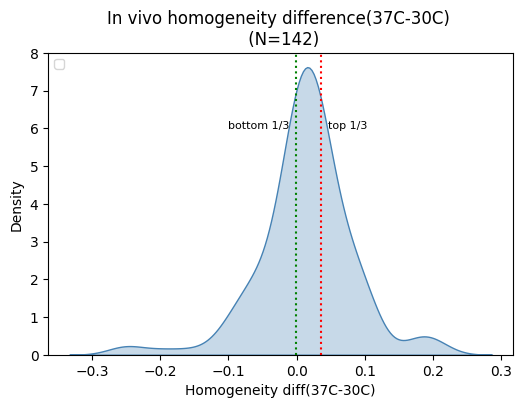

In [2]:
dir = '/home/han/proj_het_AC/rerun_analysis/0_Manuscript_codes_submission_20250723/Figure4/Data/'
merge = pd.read_csv(dir+'Integate_3utr_homo.txt',sep='\t')
merge.columns 
merge['homo_diff'] = merge['homo_37C'] - merge['homo_30C']

merge_flt = merge[['gene','population_change', 'strgroup','homo_30C', 'homo_37C','homo_diff']]
flt = merge_flt.dropna() 
df_merge = flt 
quan1 = 2/3
diff1 = df_merge['homo_diff'].quantile(q=quan1)
quan2 = 1/3
diff2 = df_merge['homo_diff'].quantile(q=quan2)

### plots ----------------------------

plt.figure(figsize=(6, 4), dpi=100)

ax=sns.kdeplot(df_merge.homo_diff, color='steelblue', fill=True,alpha=.3,linewidth=1)     
ax.axvline(df_merge['homo_diff'].quantile(q=quan1),color='red',linewidth=1.5,linestyle='dotted')
ax.text(df_merge['homo_diff'].quantile(q=quan1)+0.01, y=6, s="top 1/3",fontsize = 8)
ax.axvline(df_merge['homo_diff'].quantile(q=quan2),color='green',linewidth=1.5,linestyle='dotted')
ax.text(df_merge['homo_diff'].quantile(q=quan2)-0.10, y=6, s="bottom 1/3",fontsize = 8)

plt.xlabel("Homogeneity diff(37C-30C)")
plt.legend(loc="upper left", fontsize=9)
plt.title("In vivo homogeneity difference(37C-30C) \n (N="+str(df_merge.shape[0])+')')

dir_out = '/home/han/proj_het_AC/rerun_analysis/0_Manuscript_codes_submission_20250723/Figure4/Data/'
plt.savefig(dir_out+'Fig4a_homo_37C-30C_diff_distribution.pdf',bbox_inches='tight', dpi=300) 